In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from matplotlib.ticker import *

# Function draw cumulative-bar
def draw_WaterFall_bar(y_label, DF, DF_Table, Colors, Title, xlabel, ax):
    """
    Arguments：
    y_label : Material category
    DF: Data frame
    x_limit: x max
    CI: Carbon Intensity
    Title : figure title
    ax : Area for graphing
    CI_Judge : whether draw CI or not
    """
    ## set initials
    width = 1.0
    linewidth = 2.0
    bottom_data = 0
    y = np.arange(len(y_label))
    
    ## get x limit
    if DF.loc['Total'].Value > 0:
        xmax = DF.loc['Total'].Value
        for i in range(len(y)) :
            if DF.Value[i] < 0:
                xmax += -(DF.Value[i])
        
        x_top = round(xmax * 1.0, -(len(str(xmax).split('.')[0]) - 1))
    
        # Figure out the number of digits in x_top
        x_digit = len(str(xmax).split('.')[0])
        if x_digit < 10:
            if x_top < xmax:
                x_top += 10**(x_digit - 1)
            x_top = int(x_top)
            # Figure out the unit of x_top
            x_unit = 1000**math.floor((x_digit - 1) / 3)
            ## set x_limit
            x_top_unit = x_top / x_unit
            if x_top_unit - (xmax / x_unit) > 50:
                x_top_unit -= 50
                ax.set_xlim(0, x_top_unit)
            else:
                ax.set_xlim(0, x_top_unit)
        else:
            if x_top < xmax:
                x_top += 10**(x_digit - 2)
            x_top = int(x_top)
            # Figure out the unit of y_top
            x_unit = 1000**math.floor((x_digit - 2) / 3)
            ## set x_limit
            x_top_unit = x_top / x_unit
            if x_top_unit - (xmax / x_unit) > 50:
                x_top_unit -= 50
                ax.set_xlim(0, x_top_unit)
            else:
                ax.set_xlim(0, x_top_unit)
        
        ## set y_limit
        ax.set_ylim(-0.5, len(y)-0.5)
    
        ## Draw water fall bar
        # set Colors
        EdgeColors = Colors
        # set edgecolor
        edgecolor_list = []
        for i in range(len(y)):
            edgecolor_list.append('none')
    
        # draw water fall bar
        h_adj = x_top_unit / 200
        v_adj = 0.1
        for i in range(len(y)):
            if i == 0: 
                edgecolor = edgecolor_list.copy()
                edgecolor[i] = EdgeColors[i]
                
                ax.barh(y,DF_Table.iloc[::-1,i] / x_unit,
                        width, left=bottom_data, color=Colors[i], 
                        edgecolor=edgecolor[::-1], linewidth=linewidth)
                # write value of bar graph
    
            elif DF_Table.index[i] == 'Total' :
                bottom_data = 0
                edgecolor = edgecolor_list.copy()
                edgecolor[(len(y)-1)-i] = 'none'
                
                ax.barh(y,DF_Table.iloc[::-1,i] / x_unit, 
                        width, left=bottom_data, color=Colors[i], 
                        edgecolor=edgecolor, linewidth=linewidth)
            
            else:  
                bottom_data += DF_Table.iloc[i-1,(i-1)] / x_unit
                edgecolor = edgecolor_list.copy()
                edgecolor[i] = EdgeColors[i]
                    
                ax.barh(y,DF_Table.iloc[::-1,i] / x_unit, 
                        width, left=bottom_data, color=Colors[i], 
                        edgecolor=edgecolor[::-1], linewidth=linewidth)
                # write value of bar graph
    
    ### if 'Total' < 0 
    else :
        xmin = DF.loc['Total'].Value
        for i in range(len(y)) :
            if DF.Value[i] > 0:
                xmin += -(DF.Value[i])
        
        x_bottom = -round(abs(xmin) * 1.0, -(len(str(abs(xmin)).split('.')[0]) - 1))
        # Figure out the number of digits in x_top
        x_digit = len(str(abs(xmin)).split('.')[0])
        if x_digit < 10:
            if x_bottom > xmin:
                x_bottom -= 10**(x_digit - 1)
            x_bottom = int(x_bottom)
            # Figure out the unit of x_top
            x_unit = 1000**math.floor((x_digit - 1) / 3)
            ## set x_limit
            x_bottom_unit = x_bottom / x_unit
            if x_bottom_unit - (xmin / x_unit) < -50:
                x_bottom_unit += 50
                ax.set_xlim(0,x_bottom_unit)
            else:
                ax.set_xlim(0,x_bottom_unit)
        else:
            if x_bottom > xmin:
                x_bottom -= 10**(x_digit - 2)
            x_bottom = int(x_bottom)
            # Figure out the unit of y_top
            x_unit = 1000**math.floor((x_digit - 2) / 3)
            ## set x_limit
            x_bottom_unit = x_bottom / x_unit
            if x_bottom_unit - (xmin / x_unit) < -50:
                x_bottom_unit += 50
                ax.set_xlim(0,x_bottom_unit)
            else:
                ax.set_xlim(0,x_bottom_unit)
        
        ## set y_limit
        ax.set_ylim(-0.5, len(y)-0.5)
    
        ## Draw water fall bar
        # set Colors
        EdgeColors = Colors
        # set edgecolor
        edgecolor_list = []
        for i in range(len(y)):
            edgecolor_list.append('none')

        # draw water fall bar
        h_adj = x_bottom_unit / 200
        v_adj = 0.1
        for i in range(len(y)):
            if i == 0: 
                edgecolor = edgecolor_list.copy()
                edgecolor[(len(y)-1)-i] = EdgeColors[i]
                
                ax.barh(y,DF_Table.iloc[::-1,i] / x_unit,
                        width, left=bottom_data, color=Colors[i], 
                        edgecolor=edgecolor, linewidth=linewidth)
                # write value of bar graph
    
            elif DF_Table.index[i] == 'Total' :
                bottom_data = 0
                edgecolor = edgecolor_list.copy()
                edgecolor[(len(y)-1)-i] = 'none'
                
                ax.barh(y,DF_Table.iloc[::-1,i] / x_unit, 
                        width, left=bottom_data, color=Colors[i], 
                        edgecolor=edgecolor, linewidth=linewidth)
            
            else:  
                bottom_data += DF_Table.iloc[i-1,(i-1)] / x_unit
                edgecolor = edgecolor_list.copy()
                edgecolor[(len(y)-1)-i] = EdgeColors[i]
                    
                ax.barh(y,DF_Table.iloc[::-1,i] / x_unit, 
                        width, left=bottom_data, color=Colors[i], 
                        edgecolor=edgecolor, linewidth=linewidth)
                # write value of bar graph

        
    ## set figure elements
    ax.tick_params(labelsize=labelsize)
    ax.set_xlabel(xlabel, size=labelsize)
    ax.set_yticklabels(y_label[::-1], fontsize=labelsize, ha='right', rotation=0)
    ax.set_yticks(y)
    
    if DF.loc['Total'].Value > 0:
        if x_top_unit < 5:
            ax.xaxis.set_major_locator(MultipleLocator(1))
    else :
        if x_bottom_unit > -5:
            ax.xaxis.set_major_locator(MultipleLocator(1))
    
    ##set tittle
    ax.set_title(Title, size=fontsize + 2, loc='left')

    
def set_DataFrame(DF) :
    # Sort in descending order 
    DF_Factor = DF.drop("Total",axis=0)
    if DF.loc['Total'].Value > 0:
        DF_Factor_sort = DF_Factor.sort_values('Value',ascending=False)
    else:
        DF_Factor_sort = DF_Factor.sort_values('Value',ascending=True)

    DF_Total = DF.loc["Total"]
    n_Index = len(DF.index)
    
    # make DataFrame 
    DF_sort = DF_Factor_sort.append(DF_Total)
    DF_Table = pd.DataFrame(index=DF_sort.index, columns=range(n_Index))
    DF_Table.fillna(0, inplace=True)
    for i in range(n_Index):
        DF_Table.iloc[i,i] = DF_sort.iloc[i,1]
    
    return DF_sort, DF_Table 


def set_Colors(y_label,DF,Judge):
    Color_Improve = '#446fcc'
    Color_Worse = '#d3354c'
    Color_total = 'dimgrey'
    
    Colors_OUT =[]
    if Judge > 0:
        for i in range(len(y_label)):
            if DF.index[i] == 'Total':
                Colors_OUT.append(Color_total)
            else:
                if DF.iloc[i,1] > 0 :
                    Colors_OUT.append(Color_Improve)
                else:
                    Colors_OUT.append(Color_Worse)
    else:
        for i in range(len(y_label)):
            if DF.index[i] == 'Total':
                Colors_OUT.append(Color_total)
            else:
                if DF.iloc[i,1] < 0 :
                    Colors_OUT.append(Color_Improve)
                else:
                    Colors_OUT.append(Color_Worse)
    return Colors_OUT


# load Data
ExcelFile_R1 = '/Users/hata_s/Dropbox/01_Research/02_MF_TimeSeries/03_Matlab/02_Result/R1_Data.xlsx'
#RP: Resource productivity
df_RP = pd.read_excel(ExcelFile_R1, sheet_name='RP',skiprows=1).set_index('Factor')
df_RP_sort, df_RP_Table = set_DataFrame(df_RP)
#CUin: Cyclical use (inflow)
df_CUin = pd.read_excel(ExcelFile_R1, sheet_name='CUin',skiprows=1).set_index('Factor')
df_CUin_sort, df_CUin_Table = set_DataFrame(df_CUin)
#CUout: Cyclical use (outflow)
df_CUout = pd.read_excel(ExcelFile_R1, sheet_name='CUout',skiprows=1).set_index('Factor')
df_CUout_sort, df_CUout_Table = set_DataFrame(df_CUout)
#FD: Final disposal
df_FD = pd.read_excel(ExcelFile_R1, sheet_name='FD',skiprows=1).set_index('Factor')
df_FD_sort, df_FD_Table = set_DataFrame(df_FD)
#CF: Carbon footprint
df_CF = pd.read_excel(ExcelFile_R1, sheet_name='CF',skiprows=1).set_index('Factor')
df_CF_sort, df_CF_Table = set_DataFrame(df_CF)

print(df_RP_Table)
print(df_FD_Table)

                         0             1             2            3  \
Factor                                                                
R$_{FOS}$     13148.836918      0.000000      0.000000     0.000000   
y$_{house}$       0.000000  11783.964302      0.000000     0.000000   
L                 0.000000      0.000000  11567.138542     0.000000   
y$_{other}$       0.000000      0.000000      0.000000  6626.971669   
O                 0.000000      0.000000      0.000000     0.000000   
R$_{BIO}$         0.000000      0.000000      0.000000     0.000000   
R$_{IMP}$         0.000000      0.000000      0.000000     0.000000   
R$_{MIN}$         0.000000      0.000000      0.000000     0.000000   
y$_{export}$      0.000000      0.000000      0.000000     0.000000   
R$_{MET}$         0.000000      0.000000      0.000000     0.000000   
v                 0.000000      0.000000      0.000000     0.000000   
Total             0.000000      0.000000      0.000000     0.000000   

     

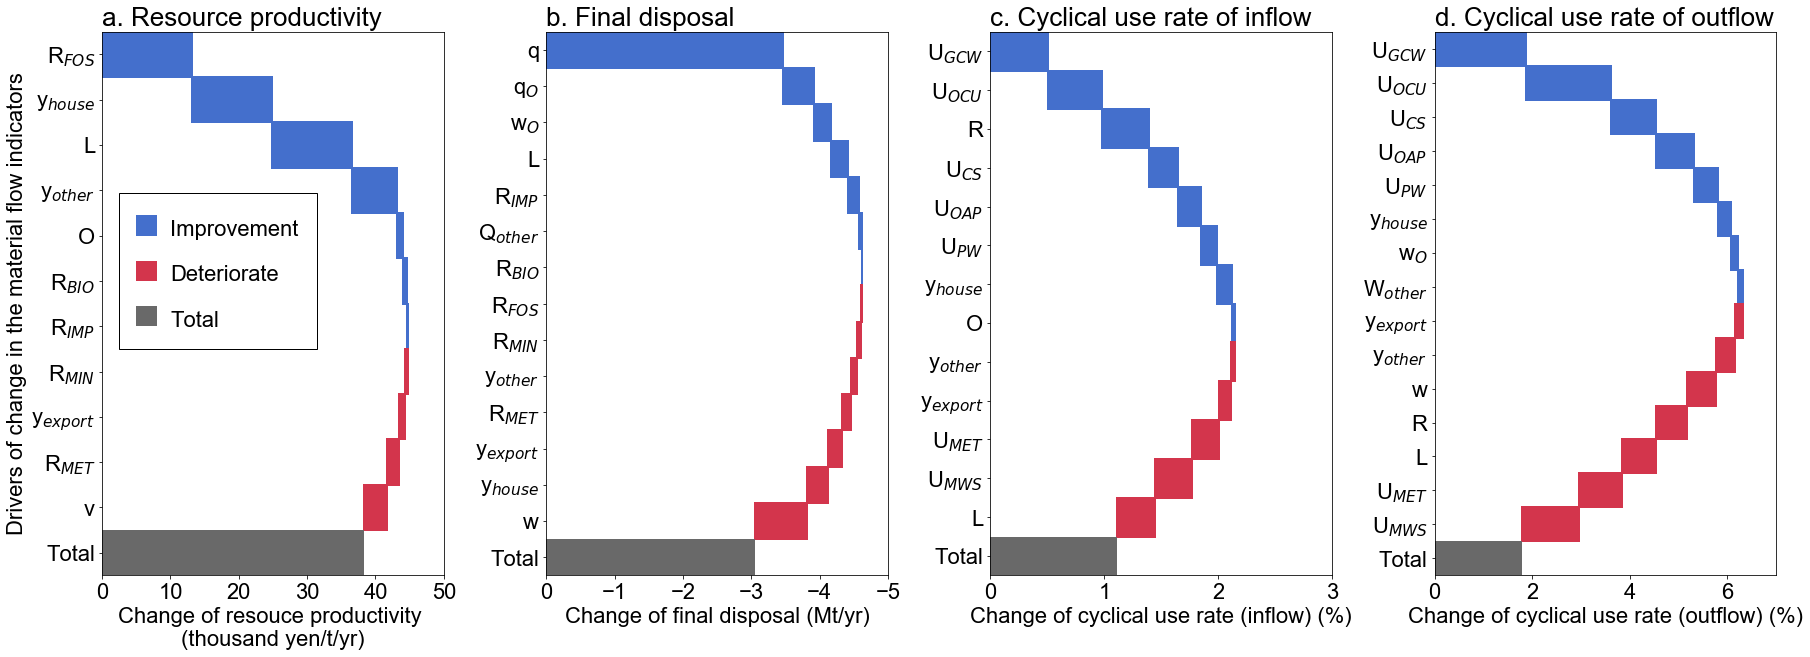

In [3]:
from matplotlib import patches
%matplotlib inline
# set plot area
fig_high = 10
fig_width = 30
fig, ax = plt.subplots(1,4,figsize=(fig_width,fig_high),
                               gridspec_kw=dict(width_ratios=[1, 1, 1, 1],height_ratios=[1],
                                                wspace=0.30, hspace=0.25)) 
plt.rcParams['font.family'] = 'Arial'
ax0=ax[0]
ax1=ax[1]
ax2=ax[2]
ax3=ax[3]



# set y-label
y_label_RP = df_RP_sort.index
y_label_CUin = df_CUin_sort.index
y_label_CUout = df_CUout_sort.index
y_label_FD = df_FD_sort.index
y_label_CF = df_CF_sort.index

# set initials
fontsize = 24
labelsize = 22

#set Colors
Colors_RP = set_Colors(y_label_RP,df_RP_sort,1)
Colors_CUin = set_Colors(y_label_CUin,df_CUin_sort,1)
Colors_CUout = set_Colors(y_label_CUout,df_CUout_sort,1)
Colors_FD = set_Colors(y_label_FD,df_FD_sort,0)
Colors_CF = set_Colors(y_label_CF,df_CF_sort,0)
            
#draw water-fall
#Fig_CF = draw_WaterFall_bar(y_label_CF, df_CF_sort, df_CF_Table, Colors_CF, 
#                           'a. Carbon footprint', 'Change of carbon footprint (Mt-CO$_2$ eq)',ax0)
Fig_RP = draw_WaterFall_bar(y_label_RP, df_RP_sort, df_RP_Table, Colors_RP, 
                            'a. Resource productivity', 'Change of resouce productivity \n(thousand yen/t/yr)',ax0)
Fig_FD = draw_WaterFall_bar(y_label_FD, df_FD_sort, df_FD_Table, Colors_FD, 
                            'b. Final disposal', 'Change of final disposal (Mt/yr)',ax1)
Fig_CUin = draw_WaterFall_bar(y_label_CUin, df_CUin_sort, df_CUin_Table, Colors_CUin, 
                            'c. Cyclical use rate of inflow', 'Change of cyclical use rate (inflow) (%)',ax2)
Fig_CUout = draw_WaterFall_bar(y_label_CUout, df_CUout_sort, df_CUout_Table, Colors_CUout, 
                            'd. Cyclical use rate of outflow', 'Change of cyclical use rate (outflow) (%)',ax3)



#draw legend
I = patches.Rectangle(xy=(5,7), width=3, height=0.45, fc='#446fcc', ec='none')
W = patches.Rectangle(xy=(5,6), width=3, height=0.45, fc='#d3354c', ec='none')
T = patches.Rectangle(xy=(5,5), width=3, height=0.45, fc='dimgrey', ec='none')
Edge = patches.Rectangle(xy=(2.5,4.5), width=29, height=3.45, fc='none', ec='black', zorder=10)

ax0.add_patch(I)
ax0.add_patch(W)
ax0.add_patch(T)
ax0.add_patch(Edge)

ax0.text(10,7, 'Improvement', fontsize=labelsize)
ax0.text(10,6, 'Deteriorate', fontsize=labelsize)
ax0.text(10,5, 'Total', fontsize=labelsize)

# set y_label
ax0.set_ylabel('Drivers of change in the material flow indicators', size=labelsize)

# Save figure
fig.savefig("/Users/hata_s/Dropbox/02_Python/03_MFI_SDA/00_Figfile/MFI_SDA_R1.svg",
             format="svg", bbox_inches="tight", facecolor='white')

In [3]:
print(y_label_RP)
print(Colors_FD)
print(Colors_RP)
print(df_CF_sort.loc['Total'].Value)
print(df_FD_sort.loc['Total'].Value)

Index(['ΔR$_{FOS}$', 'Δy$_{house}$', 'ΔL', 'Δy$_{other}$', 'ΔO', 'ΔR$_{BIO}$',
       'ΔR$_{IMP}$', 'ΔR$_{MIN}$', 'Δy$_{export}$', 'ΔR$_{MET}$', 'Δv',
       'Total'],
      dtype='object', name='Factor')
['#446fcc', '#446fcc', '#446fcc', '#446fcc', '#446fcc', '#446fcc', '#446fcc', '#d3354c', '#d3354c', '#d3354c', '#d3354c', '#d3354c', '#d3354c', '#d3354c', 'dimgrey']
['#446fcc', '#446fcc', '#446fcc', '#446fcc', '#446fcc', '#446fcc', '#446fcc', '#d3354c', '#d3354c', '#d3354c', '#d3354c', 'dimgrey']
-9950676.080016611
-3050902.2713404386


In [137]:
y = np.arange(len(y_label_FD))
xmin =df_FD.loc['Total'].Value 
for i in range(len(y)) :
    if df_FD.Value[i] > 0:
        xmin += -(df_FD.Value[i])

x_bottom = -round(abs(xmin) * 1.0, -(len(str(abs(xmin)).split('.')[0]) - 1))
x_digit = len(str(abs(xmin)).split('.')[0])

print(xmin)
print(x_bottom)
print(x_digit)

-4193300.9603555216
-4000000.0
7


In [40]:
print(Fig_CF)


None
